# Imports and reading Data

In [106]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import matplotlib.patches as mpatches

In [107]:
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, 'data')
plt.style.use('ggplot')

In [108]:
df = pd.read_csv(os.path.join(data_dir, 'Billionaires Statistics Dataset.csv'))
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


# Data Understanding

In [109]:
df.shape

(2640, 35)

In [110]:
df.head(10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


In [111]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [112]:
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [113]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


# Data Preparation

In [114]:
df = df[['rank', 'finalWorth', 'personName',
         #   'source', 'countryOfCitizenship', 'organization','lastName', 'firstName',
         'age', 'country', 'city', 'industries',
         'selfMade', 'status', 'gender',
         #'birthDate', 'title', 'state', 'residenceStateRegion', 'birthYear', 'date', 'category'
         #'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
         'life_expectancy_country',
         #'tax_revenue_country_country',
         #'latitude_country', 'longitude_country'
         'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country',
         'gdp_country', 'total_tax_rate_country', 'population_country'
         ]].copy()

In [115]:
df.shape

(2640, 16)

In [116]:
df.columns

Index(['rank', 'finalWorth', 'personName', 'age', 'country', 'city',
       'industries', 'selfMade', 'status', 'gender', 'life_expectancy_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'gdp_country',
       'total_tax_rate_country', 'population_country'],
      dtype='object')

In [117]:
df.rename(columns={'personName': 'person_name', 'finalWorth': 'final_worth', 'selfMade': 'wealth_source',
                   'gdp_country': 'gdp_country_in_dollars', 'gross_tertiary_education_enrollment':'gross_tertiary_education_enrollment_country'}, inplace=True)

In [118]:
replace_dict = {True: 'Self-Made',
                False: 'Inherited/Unearned'}
df['wealth_source'].replace(replace_dict, inplace=True)

In [119]:
df['gdp_country_in_dollars'] = pd.to_numeric(df['gdp_country_in_dollars'].str.strip('$ ').str.replace(',', ''))

In [120]:
df

,rank,final_worth,person_name,age,country,city,industries,wealth_source,status,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_in_dollars,total_tax_rate_country,population_country
0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,Inherited/Unearned,U,M,82.5,65.6,102.5,2.715518e+12,60.7,6.705989e+07
1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,Self-Made,D,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08
2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,Self-Made,D,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08
3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,Self-Made,U,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08
4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,Self-Made,D,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Yu Rong,51.0,China,Shanghai,Healthcare,Self-Made,D,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
2636,2540,1000,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Food & Beverage,Inherited/Unearned,E,M,78.5,88.2,101.8,2.142770e+13,36.6,3.282395e+08
2637,2540,1000,Zhang Gongyun,60.0,China,Gaomi,Manufacturing,Self-Made,R,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
2638,2540,1000,Zhang Guiping & family,71.0,China,Nanjing,Real Estate,Self-Made,D,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09


In [121]:
df.isna().sum()

rank                                             0
final_worth                                      0
person_name                                      0
age                                             65
country                                         38
city                                            72
industries                                       0
wealth_source                                    0
status                                           0
gender                                           0
life_expectancy_country                        182
gross_tertiary_education_enrollment_country    182
gross_primary_education_enrollment_country     181
gdp_country_in_dollars                         164
total_tax_rate_country                         182
population_country                             164
dtype: int64

In [122]:
df.loc[df.duplicated()]

,rank,final_worth,person_name,age,country,city,industries,wealth_source,status,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_in_dollars,total_tax_rate_country,population_country


In [123]:
df.loc[df.duplicated(subset=['person_name', 'country'])]

,rank,final_worth,person_name,age,country,city,industries,wealth_source,status,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_in_dollars,total_tax_rate_country,population_country
2112,2020,1400,Wang Yanqing & family,76.0,China,Weihai,Manufacturing,Inherited/Unearned,D,F,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
2317,2259,1200,Li Li,59.0,China,Shenzhen,Healthcare,Self-Made,D,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09


In [124]:
df.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

,rank,final_worth,person_name,age,country,city,industries,wealth_source,status,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_in_dollars,total_tax_rate_country,population_country
785,766,3700,Wang Yanqing & family,56.0,China,Wuxi,Manufacturing,Self-Made,D,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
1045,1027,2900,Li Li,57.0,China,Changsha,Healthcare,Self-Made,U,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
2112,2020,1400,Wang Yanqing & family,76.0,China,Weihai,Manufacturing,Inherited/Unearned,D,F,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
2317,2259,1200,Li Li,59.0,China,Shenzhen,Healthcare,Self-Made,D,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09


In [125]:
df = df.loc[~df.duplicated(subset=['person_name', 'country'])] \
    .reset_index(drop=True).copy()

In [126]:
df.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

,rank,final_worth,person_name,age,country,city,industries,wealth_source,status,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_in_dollars,total_tax_rate_country,population_country
785,766,3700,Wang Yanqing & family,56.0,China,Wuxi,Manufacturing,Self-Made,D,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
1045,1027,2900,Li Li,57.0,China,Changsha,Healthcare,Self-Made,U,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09


# Feature Understanding

In [127]:
df['age'].value_counts()

age
60.0     88
58.0     83
59.0     81
57.0     75
66.0     74
         ..
20.0      1
19.0      1
18.0      1
101.0     1
28.0      1
Name: count, Length: 79, dtype: int64

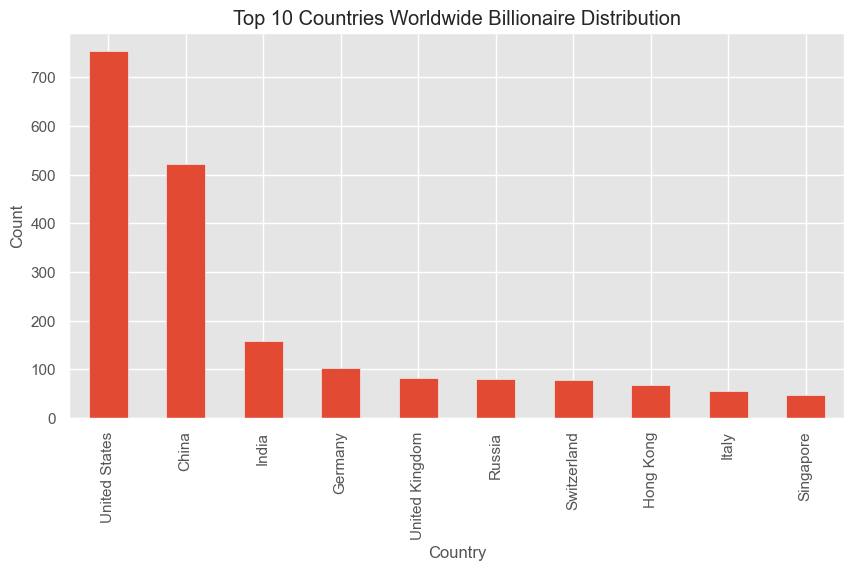

In [128]:
ax = df['country'].value_counts() \
    .head(10) \
    .plot(kind='bar',
          title='Top 10 Countries Worldwide Billionaire Distribution',
          figsize=(10, 5))
ax.set_ylabel('Count')
ax.set_xlabel('Country')
plt.show()

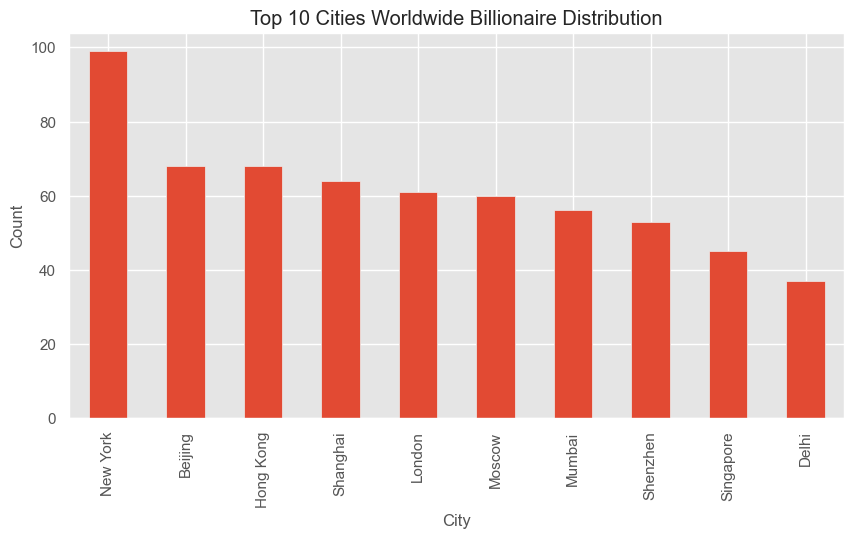

In [129]:
ax = df['city'].value_counts() \
    .head(10) \
    .plot(kind='bar',
          title='Top 10 Cities Worldwide Billionaire Distribution',
          figsize=(10, 5))
ax.set_ylabel('Count')
ax.set_xlabel('City')
plt.show()

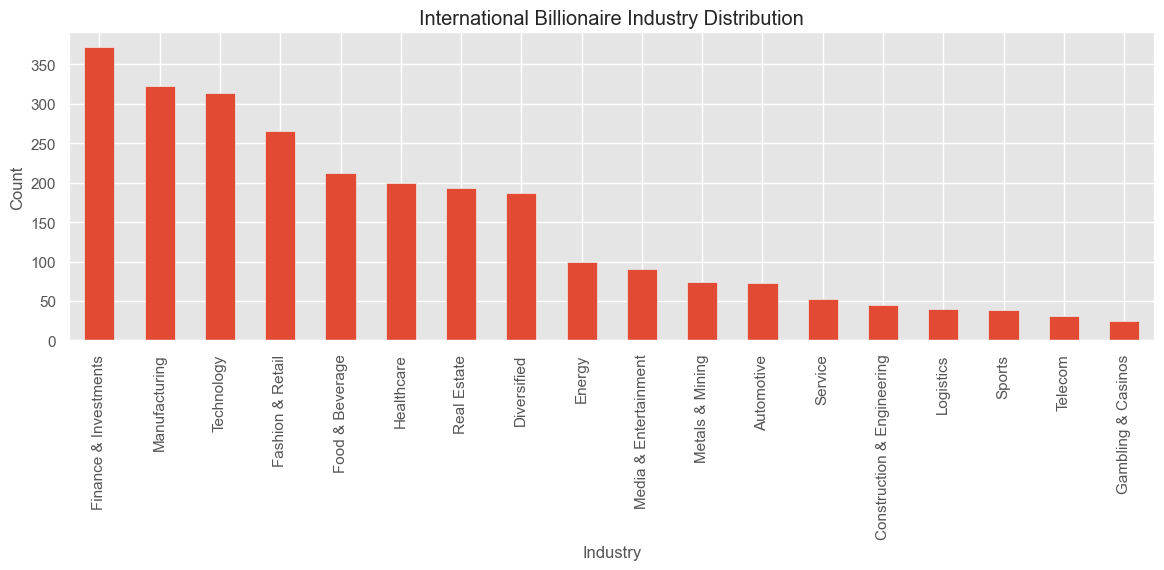

In [130]:
ax = df['industries'] \
    .value_counts() \
    .plot(kind='bar',
          title='International Billionaire Industry Distribution',
          figsize=(14, 4))
ax.set_ylabel('Count')
ax.set_xlabel('Industry')
plt.show()

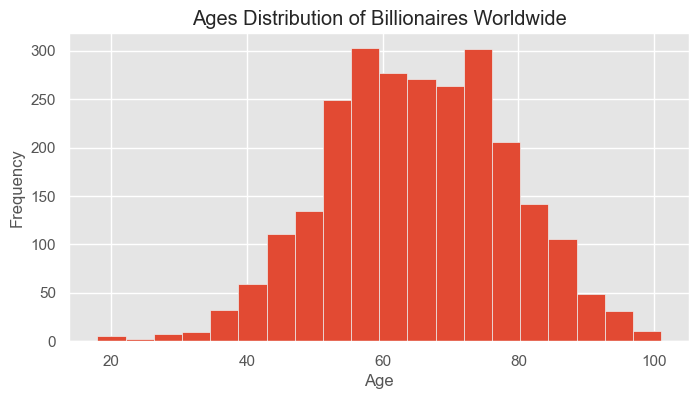

In [131]:
ax = df['age'].plot(kind='hist',
                    bins=20,
                    title='Ages Distribution of Billionaires Worldwide',
                    figsize=(8, 4))
ax.set_xlabel('Age')
plt.show()

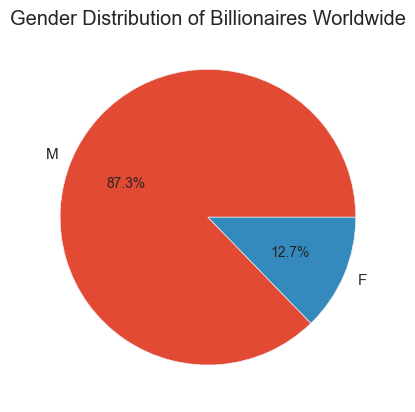

In [132]:
ax = df['gender'].value_counts() \
    .plot(kind='pie',
          title='Gender Distribution of Billionaires Worldwide',
          autopct='%1.1f%%')
ax.set_ylabel('')
plt.show()

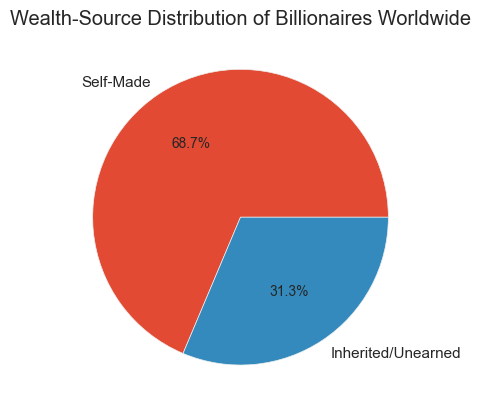

In [133]:
ax = df['wealth_source'].value_counts() \
    .plot(kind='pie',
          title='Wealth-Source Distribution of Billionaires Worldwide',
          autopct='%1.1f%%')
ax.set_ylabel('')
plt.show()

# Feature Releationships

In [134]:
sns.set_theme(style="darkgrid")

### Final Worth (M) vs. Age by Gender | Scatterplot

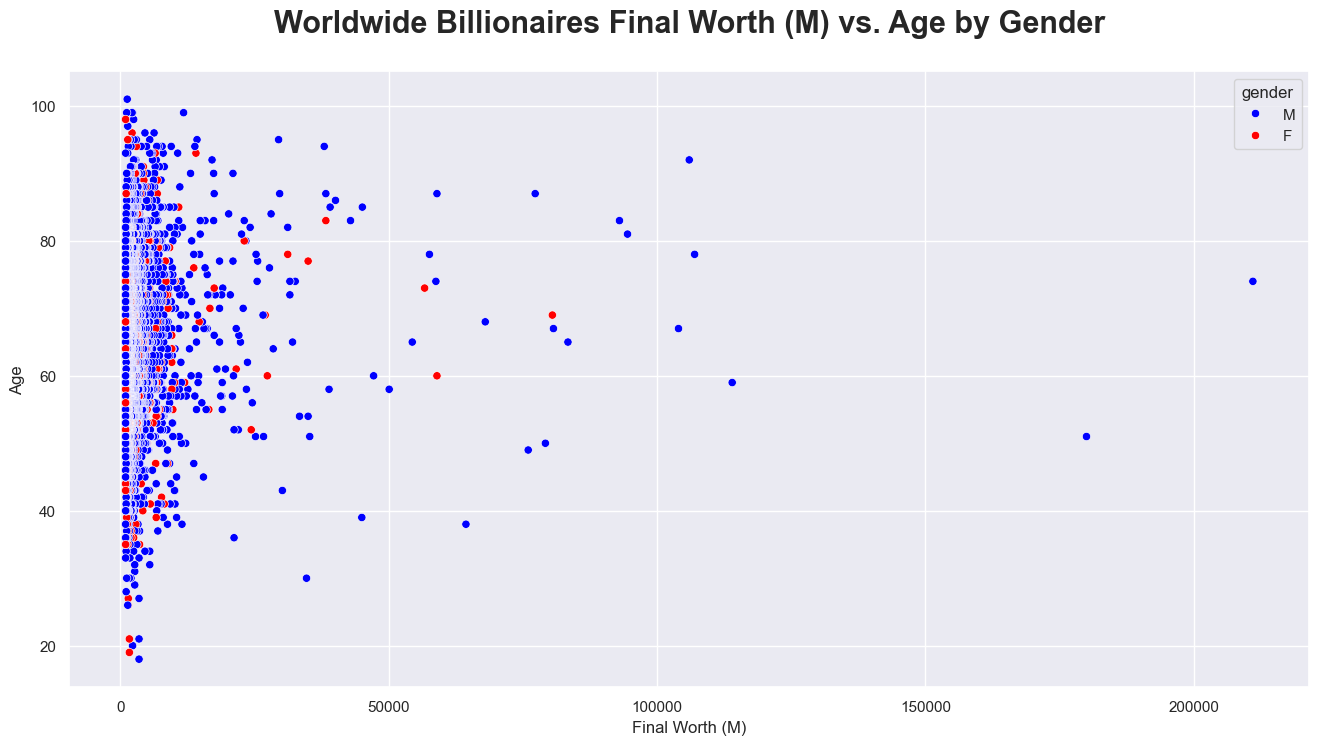

In [135]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='final_worth',
                y='age',
                hue='gender',
                palette={'M': 'blue', 'F': 'red'},
                data=df)
plt.title('Worldwide Billionaires Final Worth (M) vs. Age by Gender',
          fontweight='bold',
          fontsize=22,
          y=1.05)
plt.xlabel("Final Worth (M)")
plt.ylabel("Age")
plt.savefig('media/Worldwide_Billionaires_Final_Worth_vs_Age_by_Gender.png', bbox_inches='tight')
plt.show()

### Billionaires Count by Top Countries Worldwide and Wealth Source | Histogram

In [136]:
top_countries = df['country'].value_counts().head(20).index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]
df_top_countries['country'].unique()

array(['France', 'United States', 'India', 'China', 'Canada', 'Germany',
       'Switzerland', 'Hong Kong', 'Japan', 'United Kingdom', 'Australia',
       'Russia', 'Sweden', 'Thailand', 'Singapore', 'Israel', 'Italy',
       'Brazil', 'South Korea', 'Taiwan'], dtype=object)

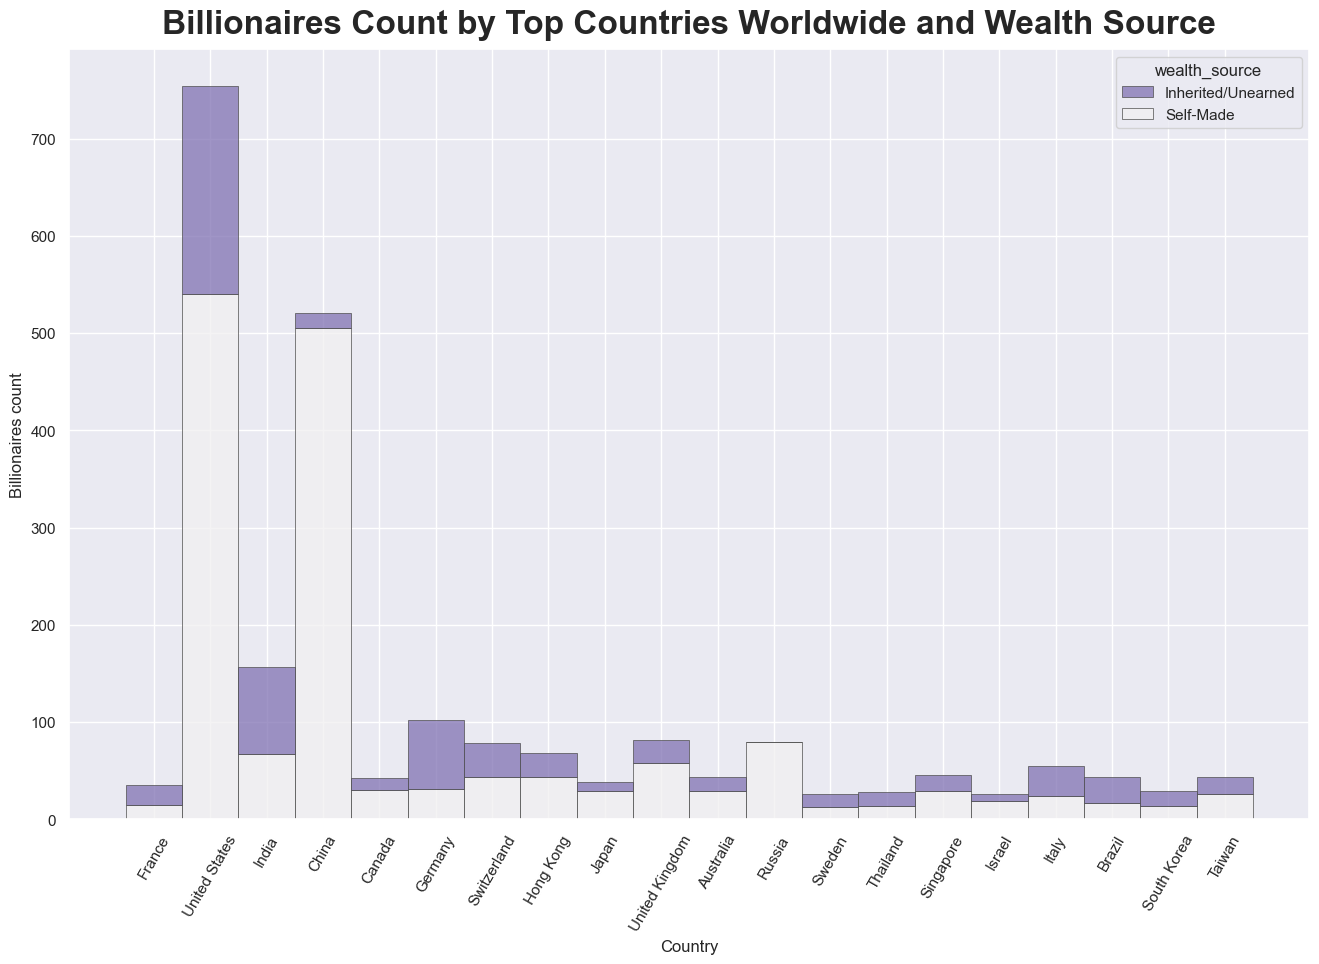

In [137]:
plt.figure(figsize=(16, 10))
sns.histplot(
    data=df_top_countries,
    x="country",
    hue="wealth_source",
    edgecolor=".3",
    palette="light:m_r",
    multiple='stack',
    linewidth=.5,
    stat='count'
)
plt.xticks(rotation=60)
plt.title("Billionaires Count by Top Countries Worldwide and Wealth Source",
          fontsize=24,
          fontweight='bold',
          y=1.01)
plt.ylabel("Billionaires count")
plt.xlabel("Country")
plt.savefig("media/Billionaires_Count_by_Top_Countries_Worldwide_and_Wealth_Source.png",bbox_inches='tight')
plt.show()

### Billionaires per Industry, Age and Gender | Violin Plot

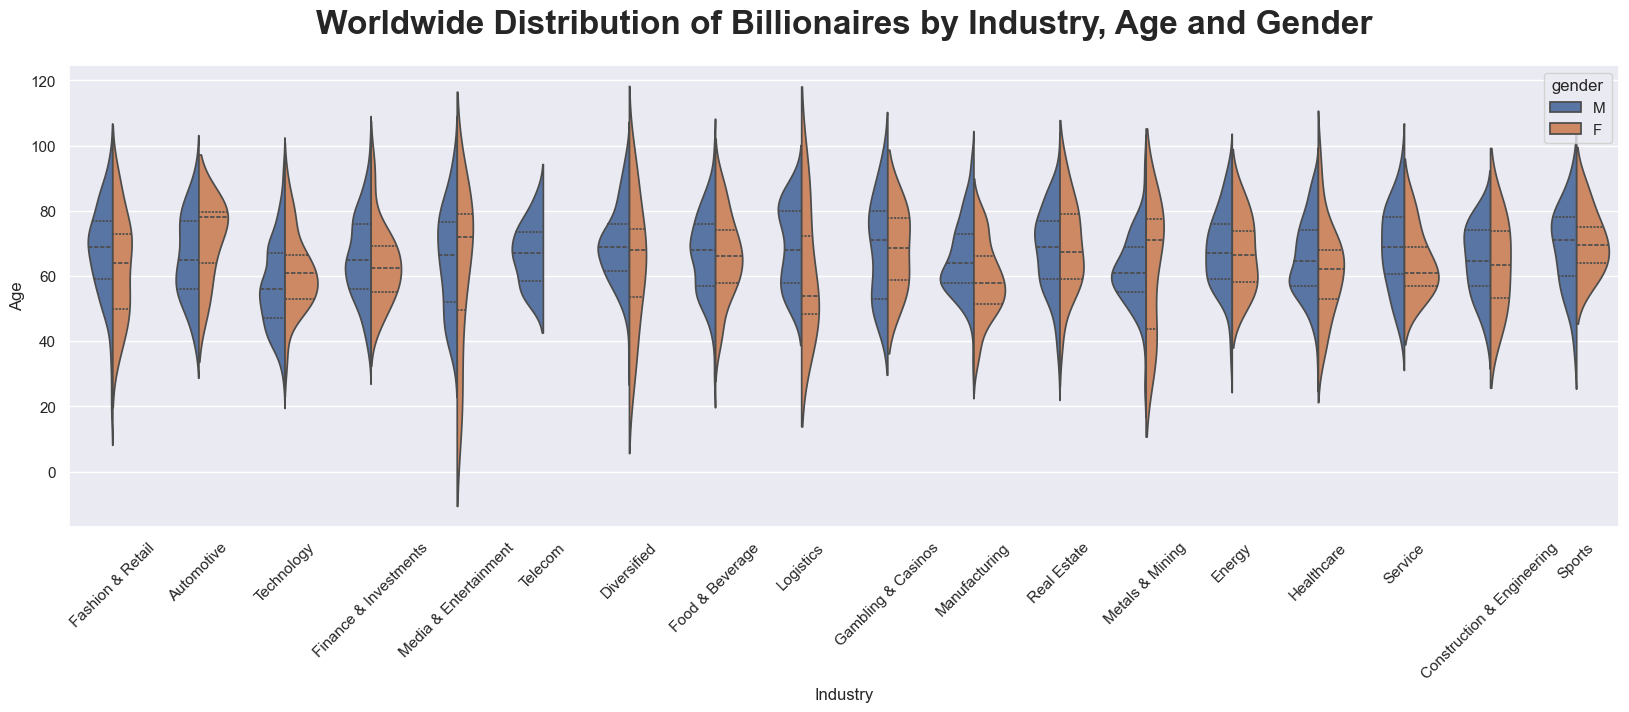

In [138]:
plt.figure(figsize=(20, 6))
sns.violinplot(data=df,
               x="industries",
               y="age",
               hue='gender',
               inner="quart",
               split=True)
plt.title("Worldwide Distribution of Billionaires by Industry, Age and Gender", 
          y=1.05,
          fontsize=24,
          fontweight="bold")
plt.ylabel("Age")
plt.xlabel("Industry")
plt.xticks(rotation=45)
plt.savefig("media/Worldwide_Distribution_of_Billionaires_by_Industry_Age_and_Gender.png",bbox_inches='tight')
plt.show()

### International Billionaire Average Final Worth (M) by Global Region and Industry

In [139]:
df['country'].unique()

array(['France', 'United States', 'Mexico', 'India', 'Spain', 'China',
       'Canada', 'Germany', 'Switzerland', 'Belgium', 'Hong Kong',
       'Austria', 'Japan', 'United Kingdom', 'Australia', 'Indonesia',
       'United Arab Emirates', 'Russia', 'Chile', 'Monaco',
       'Czech Republic', 'Sweden', nan, 'Thailand', 'Uzbekistan',
       'Singapore', 'Nigeria', 'Israel', 'Italy', 'South Africa',
       'Brazil', 'Malaysia', 'South Korea', 'New Zealand', 'Philippines',
       'Taiwan', 'Norway', 'Egypt', 'Denmark', 'Eswatini (Swaziland)',
       'Colombia', 'Netherlands', 'Poland', 'Bahamas', 'Ukraine',
       'Cayman Islands', 'Greece', 'Turkey', 'Argentina', 'Georgia',
       'Portugal', 'Kazakhstan', 'Algeria', 'Vietnam', 'Latvia',
       'Finland', 'Bermuda', 'Luxembourg', 'British Virgin Islands',
       'Cambodia', 'Lebanon', 'Oman', 'Ireland', 'Cyprus', 'Guernsey',
       'Liechtenstein', 'Turks and Caicos Islands', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Mo

In [140]:
country_to_global_region_dict = {
    'France': 'West Europe',
    'United States': 'North America',
    'Mexico': 'North America',
    'India': 'Asia',
    'Spain': 'West Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Germany': 'West Europe',
    'Switzerland': 'West Europe',
    'Belgium': 'West Europe',
    'Hong Kong': 'Asia',
    'Austria': 'West Europe',
    'Japan': 'Asia',
    'United Kingdom': 'West Europe',
    'Australia': 'Oceania',
    'Indonesia': 'Asia',
    'United Arab Emirates': 'Asia',
    'Russia': 'East Europe',
    'Chile': 'South America',
    'Monaco': 'West Europe',
    'Czech Republic': 'East Europe',
    'Sweden': 'West Europe',
    'Thailand': 'Asia',
    'Uzbekistan': 'Asia',
    'Singapore': 'Asia',
    'Nigeria': 'Africa',
    'Israel': 'Asia',
    'Italy': 'West Europe',
    'South Africa': 'Africa',
    'Brazil': 'South America',
    'Malaysia': 'Asia',
    'South Korea': 'Asia',
    'New Zealand': 'Oceania',
    'Philippines': 'Asia',
    'Taiwan': 'Asia',
    'Norway': 'West Europe',
    'Egypt': 'Africa',
    'Denmark': 'West Europe',
    'Eswatini (Swaziland)': 'Africa',
    'Colombia': 'South America',
    'Netherlands': 'West Europe',
    'Poland': 'East Europe',
    'Bahamas': 'North America',
    'Ukraine': 'East Europe',
    'Cayman Islands': 'North America',
    'Greece': 'West Europe',
    'Turkey': 'Asia',
    'Argentina': 'South America',
    'Georgia': 'East Europe',
    'Portugal': 'West Europe',
    'Kazakhstan': 'Asia',
    'Algeria': 'Africa',
    'Vietnam': 'Asia',
    'Latvia': 'East Europe',
    'Finland': 'West Europe',
    'Bermuda': 'North America',
    'Luxembourg': 'West Europe',
    'British Virgin Islands': 'North America',
    'Cambodia': 'Asia',
    'Lebanon': 'Asia',
    'Oman': 'Asia',
    'Ireland': 'West Europe',
    'Cyprus': 'Asia',
    'Guernsey': 'West Europe',
    'Liechtenstein': 'West Europe',
    'Turks and Caicos Islands': 'North America',
    'Romania': 'East Europe',
    'Qatar': 'Asia',
    'Uruguay': 'South America',
    'Nepal': 'Asia',
    'Slovakia': 'East Europe',
    'Morocco': 'Africa',
    'Hungary': 'East Europe',
    'Tanzania': 'Africa',
    'Bahrain': 'Asia',
    'Peru': 'South America',
    'Andorra': 'West Europe',
    'Armenia': 'East Europe',
    'NaN': 'Unknown'
}


In [141]:
df['global_region'] = df['country'].replace(country_to_global_region_dict)
df.query('country == global_region')

,rank,final_worth,person_name,age,country,city,industries,wealth_source,status,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_in_dollars,total_tax_rate_country,population_country,global_region


In [142]:
avg_final_worth_per_global_region = df.groupby(['industries', 'global_region'])['final_worth'].mean().reset_index()
avg_final_worth_per_global_region

,industries,global_region,final_worth
0,Automotive,Asia,4555.555556
1,Automotive,North America,18825.000000
2,Automotive,West Europe,6442.857143
3,Construction & Engineering,Africa,7400.000000
4,Construction & Engineering,Asia,1876.923077
...,...,...,...
95,Telecom,Asia,4230.769231
96,Telecom,East Europe,1700.000000
97,Telecom,North America,16028.571429
98,Telecom,Oceania,1500.000000


C:\Users\benne\PycharmProjects\billionaires_statistics\venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\benne\PycharmProjects\billionaires_statistics\venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\benne\PycharmProjects\billionaires_statistics\venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\benne\PycharmProjects\billionai

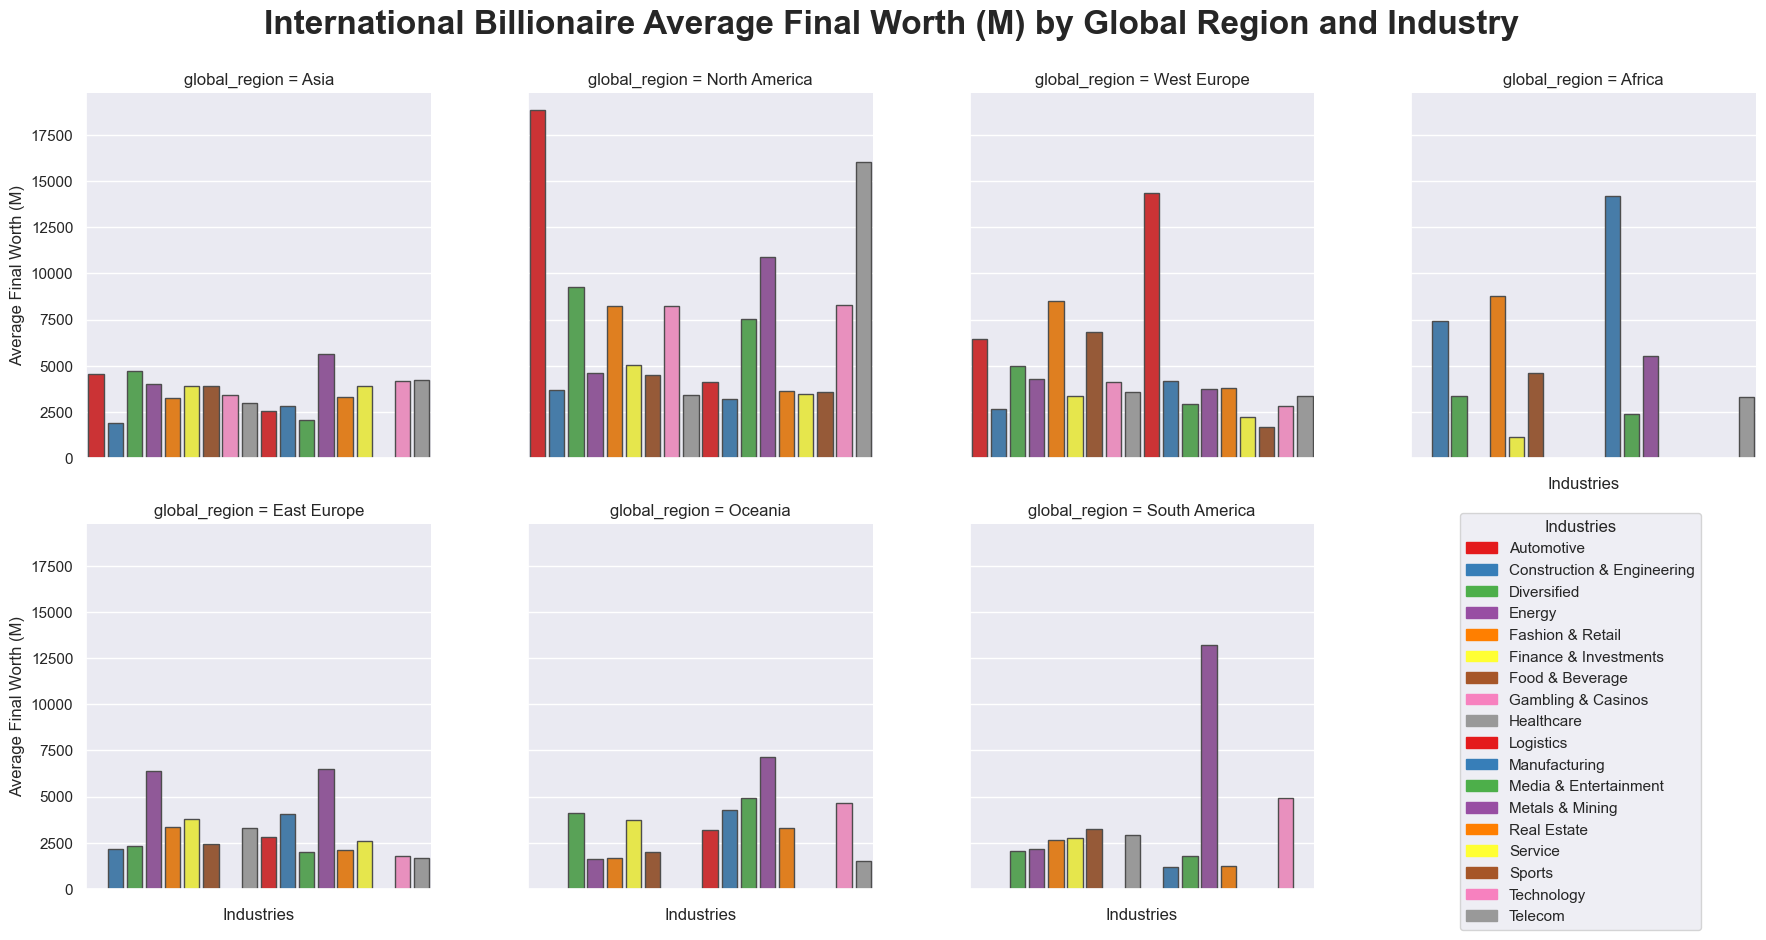

In [143]:
# Erstellung von FacetGrids für jeden globalen Bereich
g = sns.FacetGrid(data=avg_final_worth_per_global_region,
                  col='global_region',
                  col_wrap=4,
                  height=4.5)
g.map(sns.barplot,
      'industries', 'final_worth',
      edgecolor=".3",
      order=avg_final_worth_per_global_region['industries'].unique(),
      palette='Set1')
g.set_xticklabels(rotation=45)
g.set_axis_labels('Industries', 'Average Final Worth (M)')

handles = [mpatches.Patch(color=color,
                          label=label) for color, label in
           zip(sns.color_palette('Set1', n_colors=18), avg_final_worth_per_global_region['industries'].unique())]

plt.legend(handles=handles, title='Industries', bbox_to_anchor=(1.4, 1.05), loc='upper left')

title=plt.suptitle("International Billionaire Average Final Worth (M) by Global Region and Industry",
             y=1.05,
             fontweight='bold',
             fontsize=24,
             )

plt.savefig('media/International_Billionaire_Average_Final_Worth_by_Global_Region_and_Industry.png',
            bbox_inches='tight')
plt.show()

### Heatmap

In [166]:
corr_df = df[['final_worth','life_expectancy_country','gross_primary_education_enrollment_country','gross_tertiary_education_enrollment_country','gdp_country_in_dollars','total_tax_rate_country','population_country']].dropna().corr()
corr_df

,final_worth,life_expectancy_country,gross_primary_education_enrollment_country,gross_tertiary_education_enrollment_country,gdp_country_in_dollars,total_tax_rate_country,population_country
final_worth,1.000000,0.021738,-0.008940,0.066517,0.037330,-0.036062,-0.053409
life_expectancy_country,0.021738,1.000000,-0.306978,0.523889,-0.056670,-0.268308,-0.520908
gross_primary_education_enrollment_country,-0.008940,-0.306978,1.000000,-0.298943,-0.367065,0.098997,0.010836
gross_tertiary_education_enrollment_country,0.066517,0.523889,-0.298943,1.000000,0.301431,-0.393456,-0.542715
gdp_country_in_dollars,0.037330,-0.056670,-0.367065,0.301431,1.000000,0.149299,0.446676
total_tax_rate_country,-0.036062,-0.268308,0.098997,-0.393456,0.149299,1.000000,0.643605
population_country,-0.053409,-0.520908,0.010836,-0.542715,0.446676,0.643605,1.000000


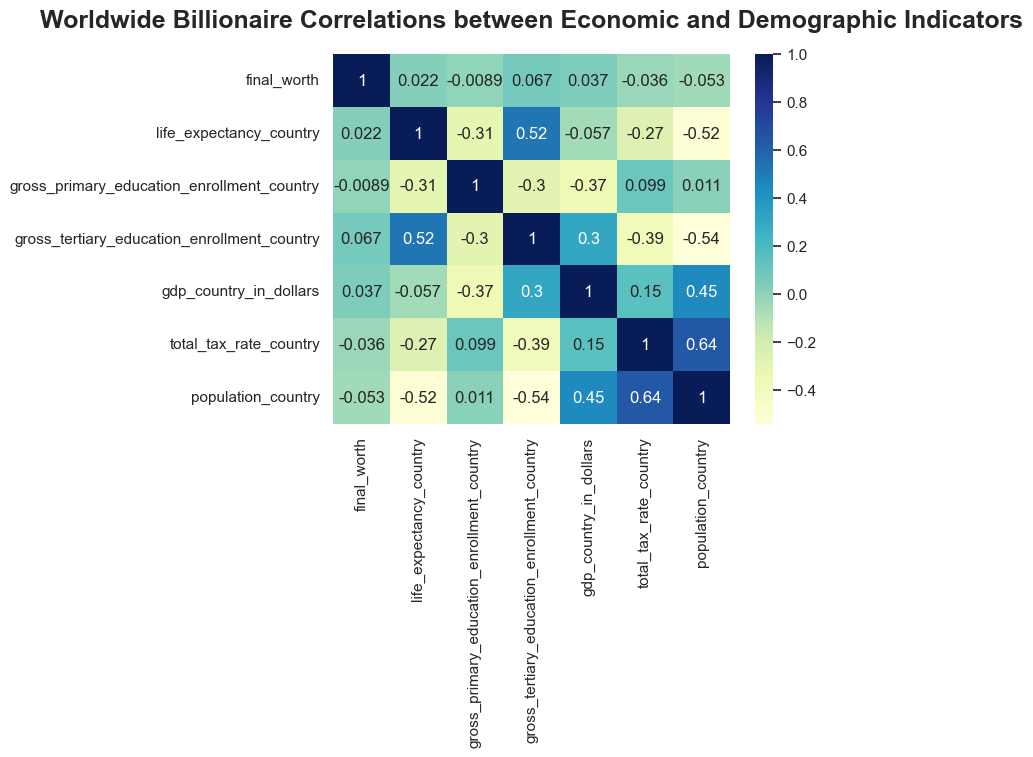

In [178]:
sns.heatmap(data=corr_df,
            annot=True,
            cmap='YlGnBu')
plt.title("Worldwide Billionaire Correlations between Economic and Demographic Indicators",
          y=1.05,
          fontweight='bold',
          fontsize=18)
plt.savefig('media/Worldwide_Billionaire_Correlations_between_Economic_and_Demographic_Indicators.png',bbox_inches='tight')
plt.show()